In [1]:
import pandas as pd
#Drive connection
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!python "/content/drive/MyDrive/Colab Notebooks/Desiré/data_prep_mf.py"

import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/Desiré/')
from data_prep_mf import *

In [3]:
!python "/content/drive/MyDrive/Colab Notebooks/Desiré/ml_functions_binary.py"

import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/Desiré/')
from ml_functions_binary import *

In [4]:
!python "/content/drive/MyDrive/Colab Notebooks/Desiré/shap_py.py"

import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/Desiré/')
from shap_py import *

#Machine Failure - Binary Classification

##Project Description

### **Problem:**
In the production process, machine failures can lead to production interruptions, resulting in financial losses amounting to millions of dollars, depending on the machine and the industry. Therefore, predicting machine failures in advance can help minimize downtime, reduce costs, and enable proactive maintenance strategies, ultimately improving overall operational efficiency.

###**Project Objective:**
Given the machine's conditions and features, the objective is to predict machine failures before they occur. This will enable proactive maintenance, minimize downtime, and optimize production efficiency.

###**Data:**
Each instance in the dataset represents a single observation of a machine during a production process, capturing its operational conditions, product characteristics, and failure status at a specific point in time. The dataset includes the following features:

**UID:** A unique identifier assigned to each observation, ranging from 1 to 10,000.

**Product ID:** A combination of a letter (L, M, or H) representing product quality variants—Low (50% of all products), Medium (30%), and High (20%)—followed by a variant-specific serial number.

**Type:** The extracted product quality category (L, M, or H) from the Product ID.

**Air Temperature [K]:** The ambient temperature around the machine, simulated using a random walk process and normalized to a standard deviation of 2 K around 300 K.

**Process Temperature [K]:** The temperature within the machine's process, calculated as air temperature plus 10 K, with additional random walk noise normalized to a standard deviation of 1 K.

**Rotational Speed [rpm]:** The machine's rotational speed, computed based on a power output of 2860 W, with normally distributed noise added.

**Torque [Nm]:** The torque applied during operation, normally distributed around 40 Nm with a standard deviation of 10 Nm, ensuring no negative values.

**Tool Wear [min]:** The amount of wear accumulated on the tool, determined by the product quality variant—H, M, and L add 5, 3, and 2 minutes of wear, respectively.

**Machine Failure:** A binary label indicating whether a machine failure occurred at this specific observation due to any of the predefined failure modes.

Each row in the dataset corresponds to a single timestamped record of a machine’s status, including its operating conditions and whether it experienced a failure.

> *This dataset is part of the following publication: S. Matzka, "Explainable Artificial Intelligence for Predictive Maintenance Applications," 2020 Third International Conference on Artificial Intelligence for Industries (AI4I), 2020, pp. 69-74, doi: 10.1109/AI4I49448.2020.00023.*

The data source link: https://www.kaggle.com/datasets/stephanmatzka/predictive-maintenance-dataset-ai4i-2020/data

In [5]:
#Data import form drive
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/project_dataset/Machine failure.csv')
df_mainteance = df.drop(['TWF','HDF','PWF', 'OSF', 'RNF'], axis=1)

df_mainteance = clean_column_names(df_mainteance)
target_col = df_mainteance.columns[-1]

df_mainteance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UDI                    10000 non-null  int64  
 1   Product ID             10000 non-null  object 
 2   Type                   10000 non-null  object 
 3   Air temperature K      10000 non-null  float64
 4   Process temperature K  10000 non-null  float64
 5   Rotational speed rpm   10000 non-null  int64  
 6   Torque Nm              10000 non-null  float64
 7   Tool wear min          10000 non-null  int64  
 8   Machine failure        10000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 703.3+ KB


In [6]:
X = df_mainteance.drop(['UDI', 'Product ID', target_col], axis=1)
y =df_mainteance[target_col]

X_train, X_test, y_train, y_test = data_split_stratified(X, y, 0.2)

X_train = apply_encoder(X_train)
X_test = apply_encoder(X_test)

stand_info = learn_standardizer(X_train)
X_train = apply_standardizer(X_train, stand_info)
X_test = apply_standardizer(X_test, stand_info)

print(f"y_train - 0: {sum(y_train==0)}, 1: {sum(y_train==1)}")
print(f"y_test - 0: {sum(y_test==0)}, 1: {sum(y_test==1)}")

y_train - 0: 7729, 1: 271
y_test - 0: 1932, 1: 68


###Des

In [7]:
# Learning pipeline, in development
#bin_info = learn_binner(df_train)
#df_train = apply_binner(df_train, bin_info)
#df_test = apply_binner(df_test, bin_info)

#impute_info = learn_imputer(df_train)
#df_train = apply_binner(df_train, impute_info)
#df_test = apply_binner(df_test, impute_info)

#stand_info = learn_standardizer(df_train)
#df_train = apply_standardizer(df_train, stand_info)
#df_test = apply_standardizer(df_test, stand_info)

#model_info = learn_model(df_train)
#df_train_predictions = apply_model(df_train, model_info)
#df_test_predictions = apply_model(df_test, model_info)

# Prediction pipeline, to be industrialised
#df_unseen = apply_binner(df_unseen, bin_info)
#df_unseen = apply_imputer(df_unseen, impute_info)
#df_unseen = apply_standardizer(df_unseen, stand_info)
#df_unseen = apply_model(df_unseen, stand_info)

##ML

###DecisionTree


Cross-validated Metrics:
Accuracy: 0.9768
Precision: 0.6596
Recall: 0.7012
F1 Score: 0.6706
Model Evaluation:
---Classification Report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7729
           1       1.00      1.00      1.00       271

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



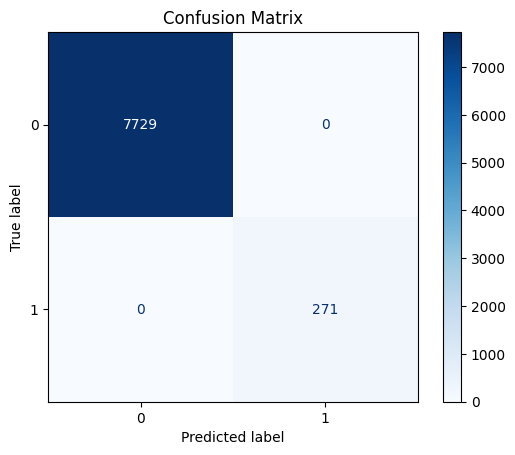

Prediction Evaluation:
---Classification Report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1932
           1       1.00      1.00      1.00        68

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



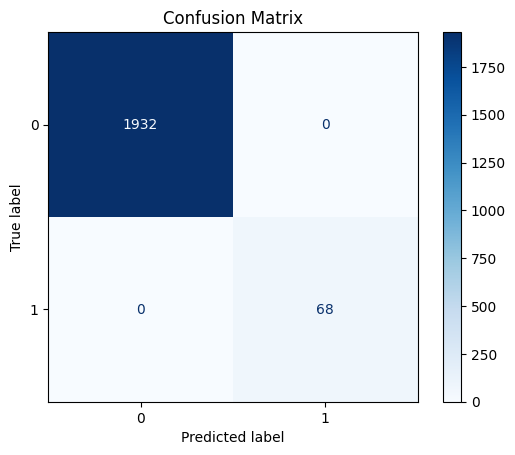

In [8]:
model_info = learn_model_dt(X_train, y_train)
df_train_predictions = apply_model(X_train, y_train, model_info)
df_test_predictions = apply_model(X_test, y_test, model_info)
print("Model Evaluation:")
evaluate_model(df_train_predictions, y_train)
print("Prediction Evaluation:")
evaluate_model(df_test_predictions, y_test)

###LogisticRegression


Cross-validated Metrics:
Accuracy: 0.9703
Precision: 0.7119
Recall: 0.1995
F1 Score: 0.3066
Model Evaluation:
---Classification Report---
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      7729
           1       0.74      0.21      0.33       271

    accuracy                           0.97      8000
   macro avg       0.86      0.60      0.66      8000
weighted avg       0.97      0.97      0.96      8000



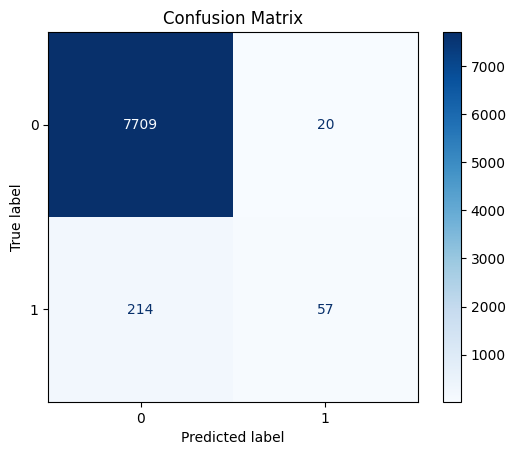

Prediction Evaluation:
---Classification Report---
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1932
           1       0.69      0.16      0.26        68

    accuracy                           0.97      2000
   macro avg       0.83      0.58      0.62      2000
weighted avg       0.96      0.97      0.96      2000



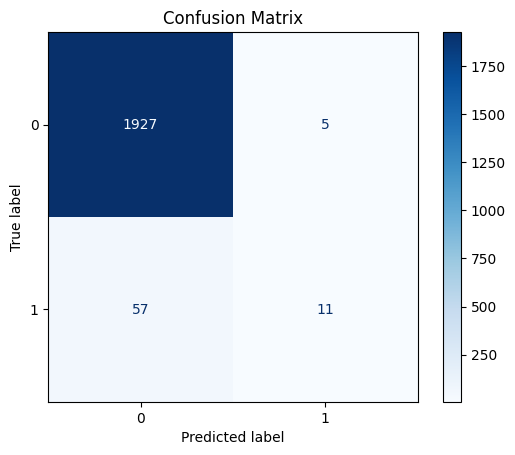

In [9]:
model_info = learn_model_logreg(X_train, y_train)
df_train_predictions = apply_model(X_train, y_train, model_info)
df_test_predictions = apply_model(X_test, y_test, model_info)
print("Model Evaluation:")
evaluate_model(df_train_predictions, y_train)
print("Prediction Evaluation:")
evaluate_model(df_test_predictions, y_test)

###RandomForest


Cross-validated Metrics:
Accuracy: 0.9821
Precision: 0.8764
Recall: 0.5646
F1 Score: 0.6664
Model Evaluation:
---Classification Report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7729
           1       1.00      1.00      1.00       271

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



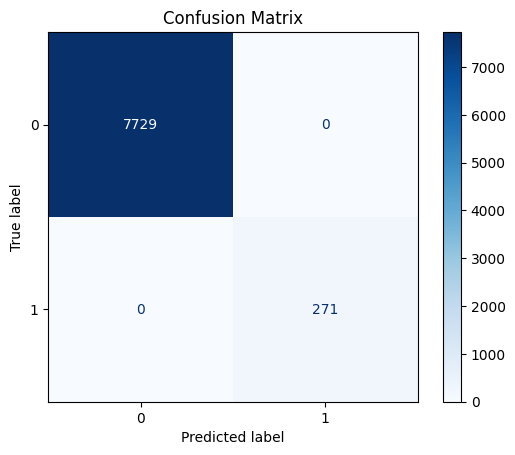

Prediction Evaluation:
---Classification Report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1932
           1       1.00      1.00      1.00        68

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



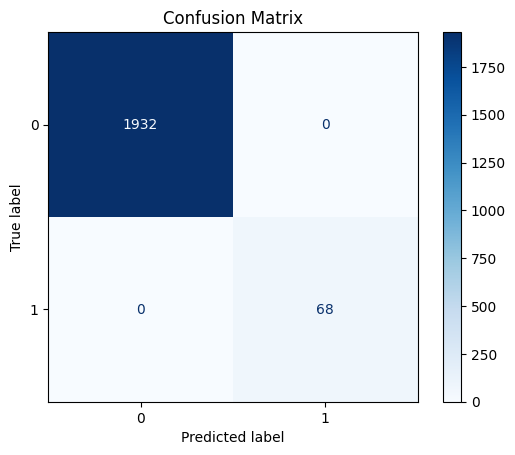

In [10]:
model_info = learn_model_rf(X_train, y_train)
df_train_predictions = apply_model(X_train, y_train, model_info)
df_test_predictions = apply_model(X_test, y_test, model_info)
print("Model Evaluation:")
evaluate_model(df_train_predictions, y_train)
print("Prediction Evaluation:")
evaluate_model(df_test_predictions, y_test)

###GradientBoosting


Cross-validated Metrics:
Accuracy: 0.9831
Precision: 0.8655
Recall: 0.6015
F1 Score: 0.6939
Model Evaluation:
---Classification Report---
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7729
           1       0.99      0.74      0.85       271

    accuracy                           0.99      8000
   macro avg       0.99      0.87      0.92      8000
weighted avg       0.99      0.99      0.99      8000



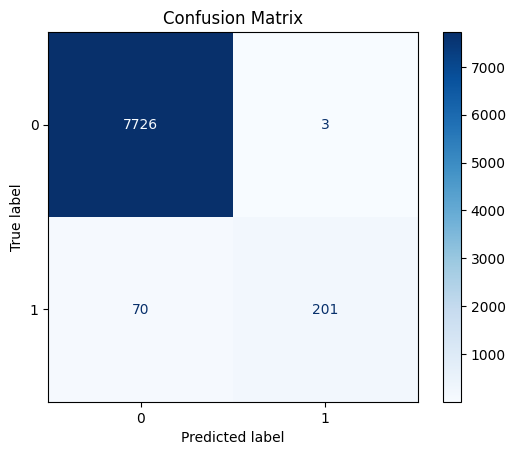

Prediction Evaluation:
---Classification Report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1932
           1       0.98      0.91      0.95        68

    accuracy                           1.00      2000
   macro avg       0.99      0.96      0.97      2000
weighted avg       1.00      1.00      1.00      2000



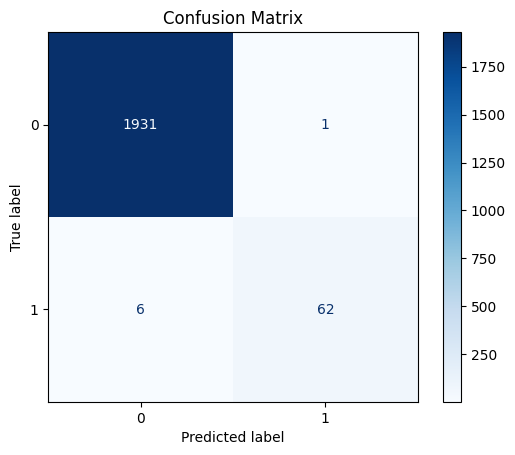

In [11]:
model_info = learn_model_gb(X_train, y_train)
df_train_predictions = apply_model(X_train, y_train, model_info)
df_test_predictions = apply_model(X_test, y_test, model_info)
print("Model Evaluation:")
evaluate_model(df_train_predictions, y_train)
print("Prediction Evaluation:")
evaluate_model(df_test_predictions, y_test)

###SVM

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p


Cross-validated Metrics:
Accuracy: 0.9661
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Model Evaluation:
---Classification Report---
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      7729
           1       1.00      0.00      0.01       271

    accuracy                           0.97      8000
   macro avg       0.98      0.50      0.50      8000
weighted avg       0.97      0.97      0.95      8000



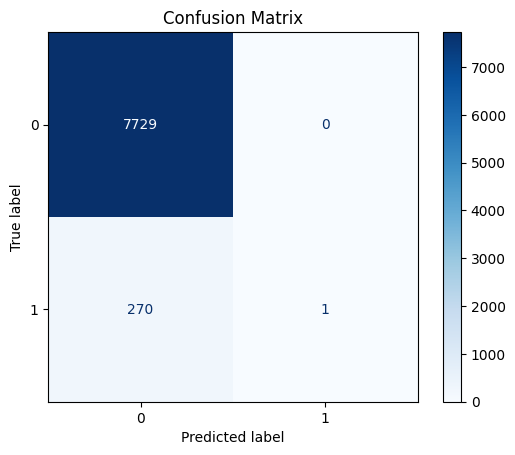

Prediction Evaluation:
---Classification Report---
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1932
           1       0.00      0.00      0.00        68

    accuracy                           0.97      2000
   macro avg       0.48      0.50      0.49      2000
weighted avg       0.93      0.97      0.95      2000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


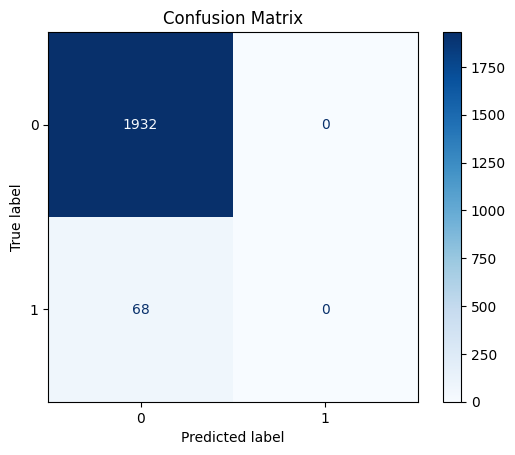

In [12]:
model_info = learn_model_svm(X_train, y_train)
df_train_predictions = apply_model(X_train, y_train, model_info)
df_test_predictions = apply_model(X_test, y_test, model_info)
print("Model Evaluation:")
evaluate_model(df_train_predictions, y_train)
print("Prediction Evaluation:")
evaluate_model(df_test_predictions, y_test)

###KNN


Cross-validated Metrics:
Accuracy: 0.9703
Precision: 0.7347
Recall: 0.1993
F1 Score: 0.3128
Model Evaluation:
---Classification Report---
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7729
           1       0.82      0.31      0.45       271

    accuracy                           0.97      8000
   macro avg       0.90      0.65      0.72      8000
weighted avg       0.97      0.97      0.97      8000



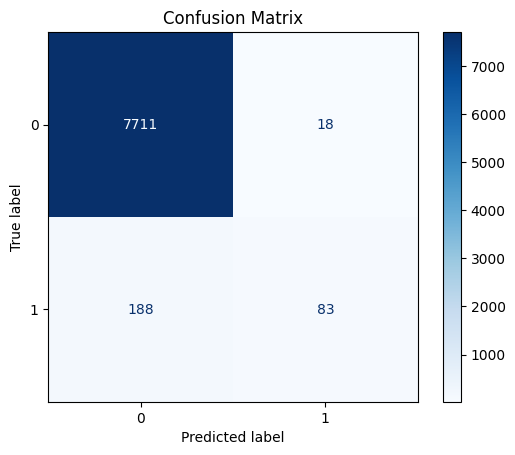

Prediction Evaluation:
---Classification Report---
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1932
           1       0.80      0.29      0.43        68

    accuracy                           0.97      2000
   macro avg       0.89      0.65      0.71      2000
weighted avg       0.97      0.97      0.97      2000



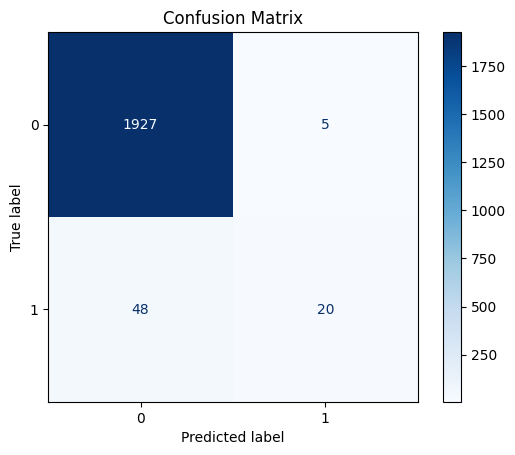

In [13]:
model_info = learn_model_knn(X_train, y_train)
df_train_predictions = apply_model(X_train, y_train, model_info)
df_test_predictions = apply_model(X_test, y_test, model_info)
print("Model Evaluation:")
evaluate_model(df_train_predictions, y_train)
print("Prediction Evaluation:")
evaluate_model(df_test_predictions, y_test)

###NaiveBayes


Cross-validated Metrics:
Accuracy: 0.9596
Precision: 0.3542
Recall: 0.2290
F1 Score: 0.2773
Model Evaluation:
---Classification Report---
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      7729
           1       0.37      0.24      0.29       271

    accuracy                           0.96      8000
   macro avg       0.67      0.61      0.63      8000
weighted avg       0.95      0.96      0.96      8000



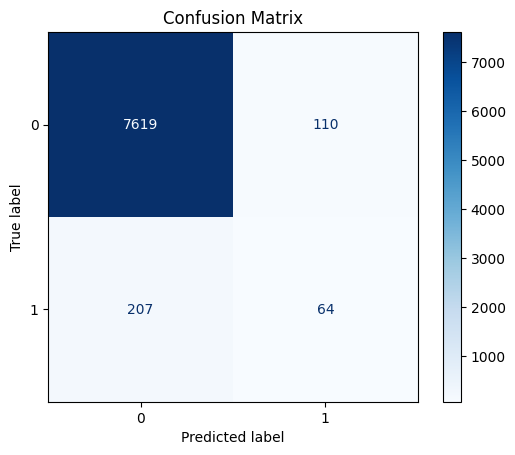

Prediction Evaluation:
---Classification Report---
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1932
           1       0.33      0.16      0.22        68

    accuracy                           0.96      2000
   macro avg       0.65      0.58      0.60      2000
weighted avg       0.95      0.96      0.95      2000



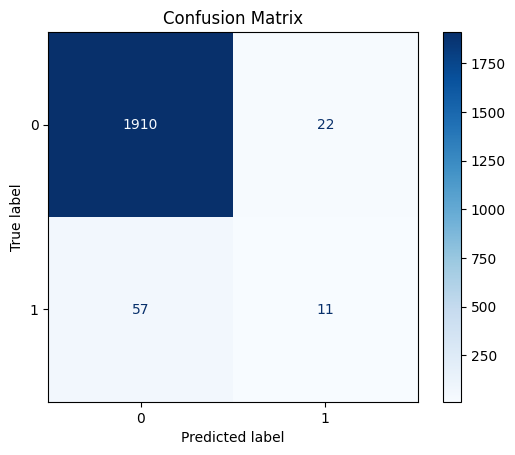

In [14]:
model_info = learn_model_nb(X_train, y_train)
df_train_predictions = apply_model(X_train, y_train, model_info)
df_test_predictions = apply_model(X_test, y_test, model_info)
print("Model Evaluation:")
evaluate_model(df_train_predictions, y_train)
print("Prediction Evaluation:")
evaluate_model(df_test_predictions, y_test)

###XGB


Cross-validated Metrics:
Accuracy: 0.9837
Precision: 0.8290
Recall: 0.6604
F1 Score: 0.7338
Model Evaluation:
---Classification Report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7729
           1       1.00      1.00      1.00       271

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



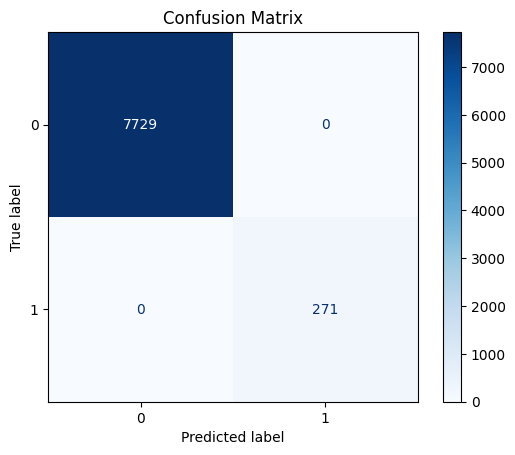

Prediction Evaluation:
---Classification Report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1932
           1       1.00      1.00      1.00        68

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



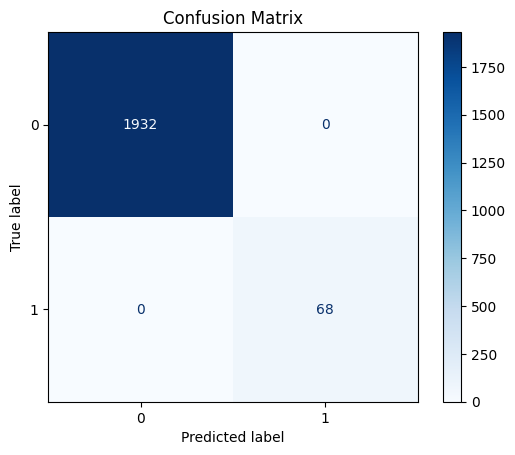

In [15]:
model_info = learn_model_xgb(X_train, y_train)
df_train_predictions = apply_model(X_train, y_train, model_info)
df_test_predictions = apply_model(X_test, y_test, model_info)
print("Model Evaluation:")
evaluate_model(df_train_predictions, y_train)
print("Prediction Evaluation:")
evaluate_model(df_test_predictions, y_test)

###LightGBM

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 217, number of negative: 6183
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001137 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 921
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.033906 -> initscore=-3.349662
[LightGBM] [Info] Start training from score -3.349662
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 217, number of negative: 6183
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000710 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 921
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 

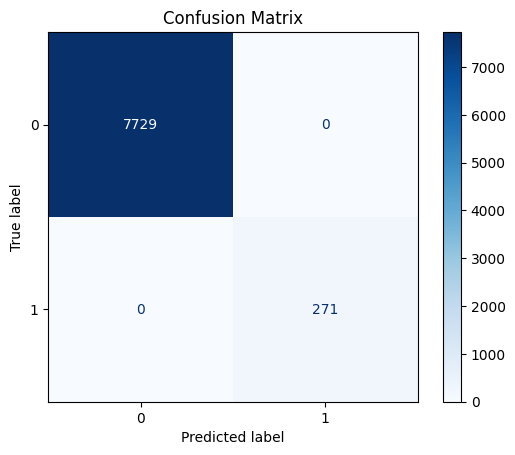

Prediction Evaluation:
---Classification Report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1932
           1       1.00      1.00      1.00        68

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



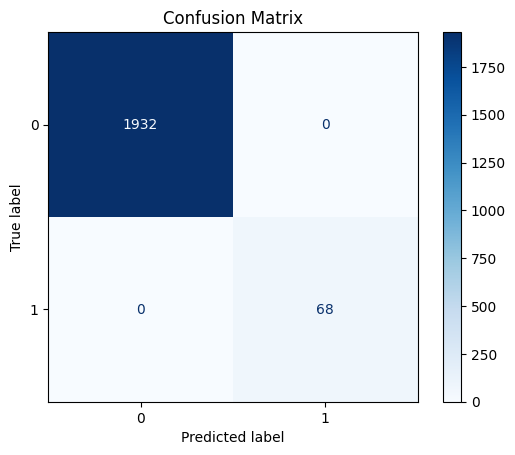

In [16]:
model_info = learn_model_lgbm(X_train, y_train)
df_train_predictions = apply_model(X_train, y_train, model_info)
df_test_predictions = apply_model(X_test, y_test, model_info)
print("Model Evaluation:")
evaluate_model(df_train_predictions, y_train)
print("Prediction Evaluation:")
evaluate_model(df_test_predictions, y_test)

#fine tune the best model

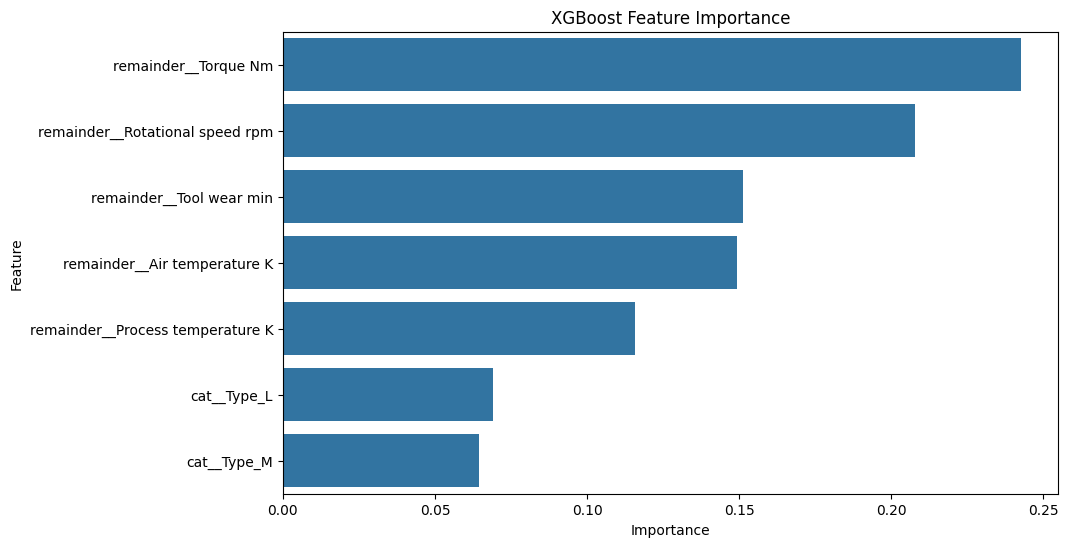

Feature Importance Scores:
                            Feature  Importance
5              remainder__Torque Nm    0.242605
4   remainder__Rotational speed rpm    0.207874
6          remainder__Tool wear min    0.151106
2      remainder__Air temperature K    0.149371
3  remainder__Process temperature K    0.115598
0                       cat__Type_L    0.068930
1                       cat__Type_M    0.064516


{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

In [17]:
best_params = fine_tune_binary_classifier('XGBoost', X_test, y_test, cv=5, scoring='recall')
best_params


Cross-validated Metrics:
Accuracy: 0.9836
Precision: 0.8239
Recall: 0.6640
F1 Score: 0.7330
Model Evaluation:
---Classification Report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7729
           1       1.00      0.94      0.97       271

    accuracy                           1.00      8000
   macro avg       1.00      0.97      0.98      8000
weighted avg       1.00      1.00      1.00      8000



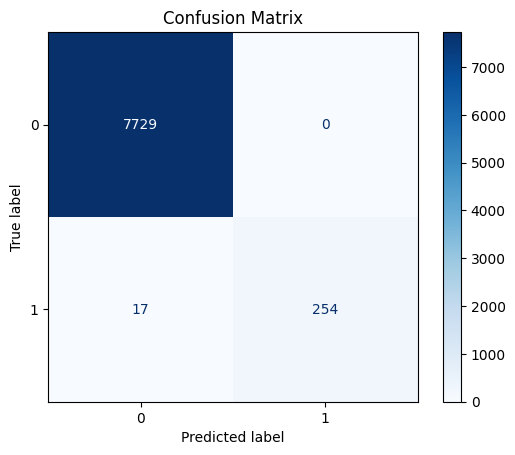

Prediction Evaluation:
---Classification Report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1932
           1       1.00      1.00      1.00        68

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



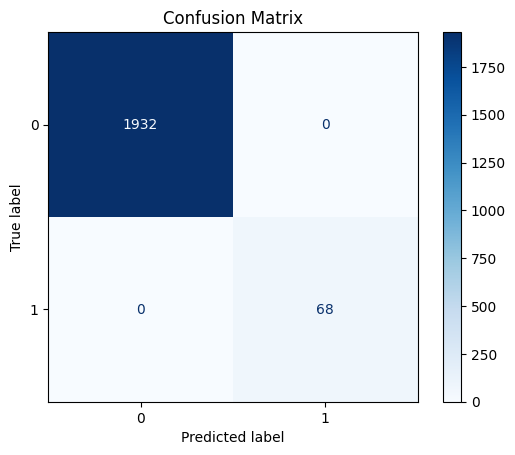

In [18]:
model_info = learn_model_xgb(X_train, y_train, params=best_params)
df_train_predictions = apply_model(X_train, y_train, model_info)
df_test_predictions = apply_model(X_test, y_test, model_info)
print("Model Evaluation:")
evaluate_model(df_train_predictions, y_train)
print("Prediction Evaluation:")
evaluate_model(df_test_predictions, y_test)

###SHAP

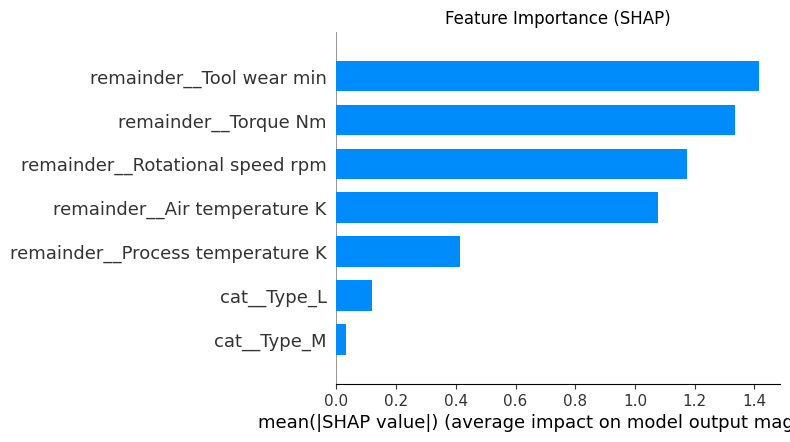

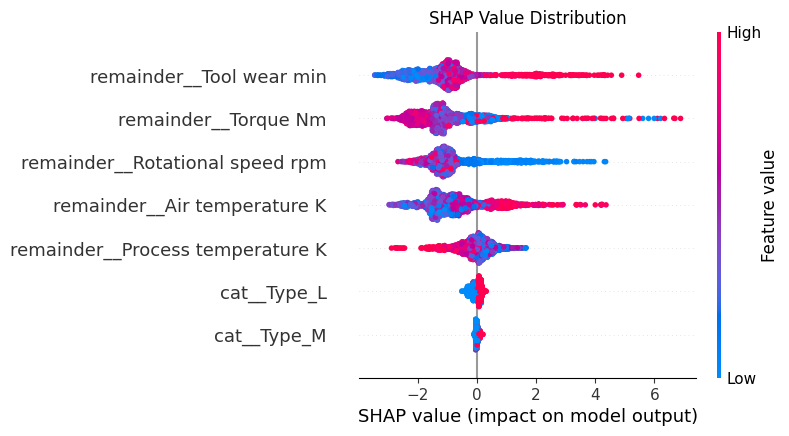

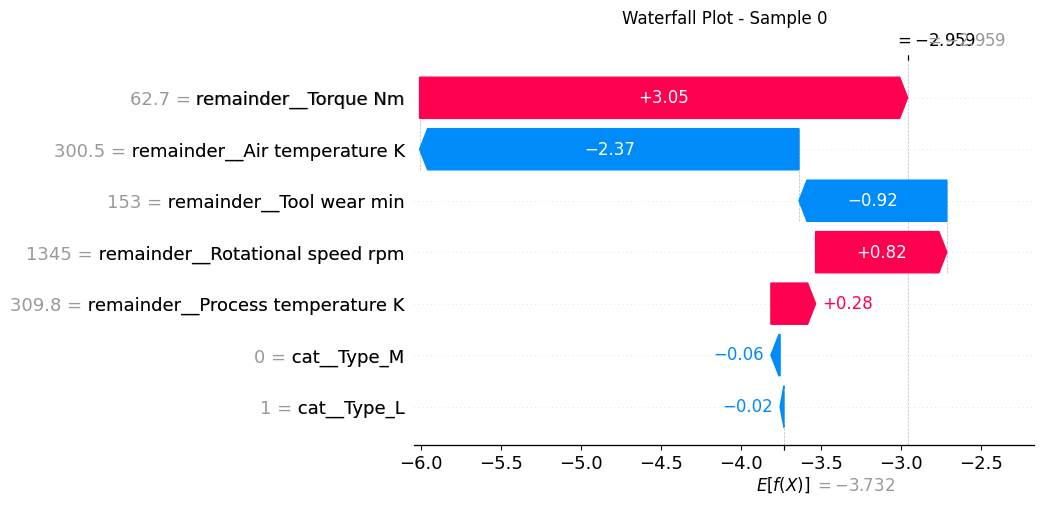

Decision plot could not be generated: decision() missing 1 required positional argument: 'shap_values'


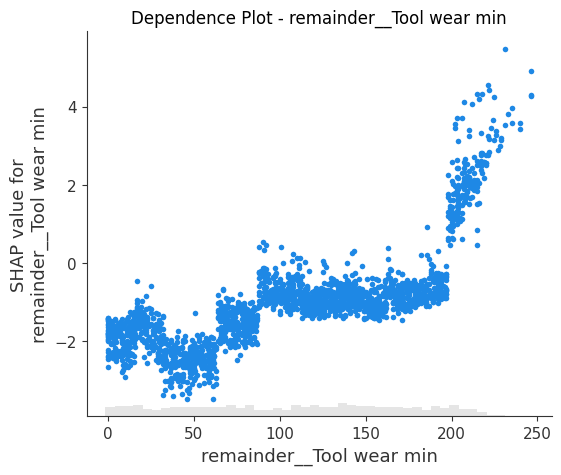

(<shap.explainers._tree.TreeExplainer at 0x78b2fff6c890>,
 .values =
 array([[-0.02391236, -0.0573332 , -2.3700485 , ...,  0.81987333,
          3.0489051 , -0.92366797],
        [ 0.03927762, -0.02958559,  0.948135  , ..., -1.5752636 ,
         -1.2393286 , -0.86971337],
        [ 0.1104608 , -0.03176951,  0.42540538, ..., -1.3018466 ,
         -0.5445945 ,  2.2151234 ],
        ...,
        [-0.32384038,  0.02569165, -0.9602959 , ..., -1.2793533 ,
         -2.24136   , -1.1053065 ],
        [ 0.00810489,  0.11123855,  0.23922646, ..., -1.5560203 ,
         -1.6801491 , -0.8236266 ],
        [-0.23424213, -0.01359444, -0.49086663, ..., -0.9216    ,
          0.06906969, -3.023897  ]], dtype=float32)
 
 .base_values =
 array([-3.731803, -3.731803, -3.731803, ..., -3.731803, -3.731803,
        -3.731803], dtype=float32)
 
 .data =
 array([[1.000e+00, 0.000e+00, 3.005e+02, ..., 1.345e+03, 6.270e+01,
         1.530e+02],
        [1.000e+00, 0.000e+00, 3.037e+02, ..., 1.513e+03, 4.010e+01,

In [21]:
explain_model(model_info, X_train, X_test, sample_index=0, top_n_features=10, save_path=None, model_type='tree')